In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [130]:
df = pd.read_csv("profiles.csv")
df.offspring.replace({np.nan:-1}, inplace=True)
for choice in df.offspring.unique():
    if choice == -1:
        continue
    else:
        newstr = str(choice)
        newstr = choice.replace('&rsquo;','\'')
        df.offspring.replace({choice:newstr}, inplace=True)
df.sign.replace({np.nan:'it doesn\'t matter'}, inplace=True)
for choice in df.sign.unique():
    if choice == 'it doesn\'t matter':
        continue
    else:
        newstr = str(choice)
        newstr = choice.replace('&rsquo;','\'')
        df.sign.replace({choice:newstr}, inplace=True)
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",-1,straight,has cats,NaN,m,pisces but it doesn't matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",-1,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [131]:
print(df.columns)

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [132]:
print(len(df))

59946


In [133]:
narrowed_df = df.drop(columns=['essay0','essay1','essay2','essay3','essay4','essay5','essay6',
                               'essay7','essay8','essay9','status','speaks','last_online',
                               'income','diet', 'location'])
narrowed_df.head()

,age,body_type,drinks,drugs,education,ethnicity,height,job,offspring,orientation,pets,religion,sex,sign,smokes
0,22,a little extra,socially,never,working on college/university,"asian, white",75.0,transportation,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes
1,35,average,often,sometimes,working on space camp,white,70.0,hospitality / travel,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no
2,38,thin,socially,NaN,graduated from masters program,NaN,68.0,NaN,-1,straight,has cats,NaN,m,pisces but it doesn't matter,no
3,23,thin,socially,NaN,working on college/university,white,71.0,student,doesn't want kids,straight,likes cats,NaN,m,pisces,no
4,29,athletic,socially,never,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,-1,straight,likes dogs and likes cats,NaN,m,aquarius,no


In [134]:
# for col in narrowed_df.columns:
#     print(col)
#     print(narrowed_df[col].value_counts())
#     print('\n')

In [135]:
# problem to solve with ML:
# predict drug use based on variables 

In [136]:
print("Number of people that did not put their drug use down:")
print(len(narrowed_df[narrowed_df.drugs.isna()]))
df2 = narrowed_df
# target drugs column, xvars all other columns
tgt = df2['drugs']
xvar = df2.drop(columns='drugs')

Number of people that did not put their drug use down:
14080


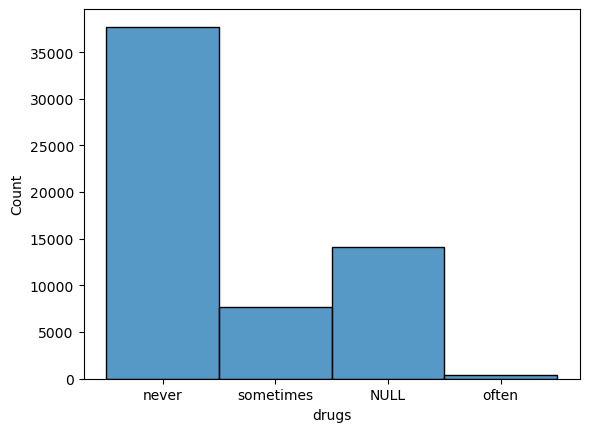

<Figure size 640x480 with 0 Axes>

In [137]:
temp1 = df2.drugs.fillna("NULL")
sns.histplot(temp1)
plt.show()
plt.clf()

In [138]:
# numerical vars: age, height; then vars to make numeric: body type, religion
xvar.head()

,age,body_type,drinks,education,ethnicity,height,job,offspring,orientation,pets,religion,sex,sign,smokes
0,22,a little extra,socially,working on college/university,"asian, white",75.0,transportation,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes
1,35,average,often,working on space camp,white,70.0,hospitality / travel,"doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no
2,38,thin,socially,graduated from masters program,NaN,68.0,NaN,-1,straight,has cats,NaN,m,pisces but it doesn't matter,no
3,23,thin,socially,working on college/university,white,71.0,student,doesn't want kids,straight,likes cats,NaN,m,pisces,no
4,29,athletic,socially,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,-1,straight,likes dogs and likes cats,NaN,m,aquarius,no


In [139]:
# for col in xvar.columns:
#     print(col)
#     print(xvar[col].value_counts(dropna=False))
#     print("\n")
    
# transforming body type and religion columns to numeric
# body type: 1-10 with 10 being best
# body type groupings: overweight(1), full figured(2), a little extra(3), skinny(4), average(5), thin(6), curvy(7), 
# fit(8), athletic(9), jacked(10) and removing used up and rather not say
xvar = xvar.loc[(xvar.body_type != 'used up') & (xvar.body_type != 'rather not say')]
xvar.body_type.replace({
    'overweight':1, 'full figured':2, 'a little extra':3, 'skinny':4, 'average':5, 'thin':6, 'curvy':7, 'fit':8, 'athletic':9, 'jacked':10
}, inplace=True)


In [140]:
xvar = xvar.loc[xvar.body_type.notnull()]
xvar.body_type = xvar.body_type.astype('int64')
print(xvar.body_type.value_counts())

5     14652
8     12711
9     11819
6      4711
7      3924
3      2629
4      1777
2      1009
1       444
10      421
Name: body_type, dtype: int64


In [141]:
# religion: 1-5 with 5 being most serious about it
# religion groupings: null + any form of athiesm + laughing about it(1), not too serious(2), somewhat serious(3), 
# very serious(4), other + religion name(5)
# print(xvar.religion.unique())
xvar.religion.replace({np.nan:1}, inplace=True)
for standing in xvar.religion.unique():
    if standing==1:
        continue
    elif 'and laughing' in standing or 'atheism' in standing:
        xvar.religion.replace({standing:1}, inplace=True)
    elif 'not too serious' in standing:
        xvar.religion.replace({standing:2}, inplace=True)
    elif 'somewhat' in standing:
        xvar.religion.replace({standing:3}, inplace=True)
    elif 'very' in standing:
        xvar.religion.replace({standing:4}, inplace=True)
    else:
        xvar.religion.replace({standing:5}, inplace=True)
print(xvar.religion.value_counts())

1    30270
2    10160
5     8783
3     3399
4     1485
Name: religion, dtype: int64


In [142]:
# categorical vars: drinks, education, ethnicity, job, location, offspring, orientation, pets, sex, sign, smokes
xvar.head()

,age,body_type,drinks,education,ethnicity,height,job,offspring,orientation,pets,religion,sex,sign,smokes
0,22,3,socially,working on college/university,"asian, white",75.0,transportation,"doesn't have kids, but might want them",straight,likes dogs and likes cats,4,m,gemini,sometimes
1,35,5,often,working on space camp,white,70.0,hospitality / travel,"doesn't have kids, but might want them",straight,likes dogs and likes cats,2,m,cancer,no
2,38,6,socially,graduated from masters program,NaN,68.0,NaN,-1,straight,has cats,1,m,pisces but it doesn't matter,no
3,23,6,socially,working on college/university,white,71.0,student,doesn't want kids,straight,likes cats,1,m,pisces,no
4,29,9,socially,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,-1,straight,likes dogs and likes cats,1,m,aquarius,no


In [143]:
for col in xvar.columns:
    print(col)
    print(xvar[col].value_counts())
    print('\n')
# condense: education, ethnicity, offspring, pets, sign

age
26     3293
27     3284
28     3136
25     3107
29     2962
24     2849
30     2812
31     2448
32     2304
23     2300
33     1997
22     1720
34     1711
35     1585
36     1458
37     1316
38     1244
21     1171
39     1085
42      990
40      949
41      900
20      872
43      796
44      651
45      609
19      547
46      536
47      499
48      457
49      439
50      402
51      330
52      324
18      283
56      259
54      250
55      247
57      239
53      233
59      212
58      188
60      184
61      170
62      156
63      129
64      111
65      103
66      100
67       63
68       55
69       31
109       1
Name: age, dtype: int64


body_type
5     14652
8     12711
9     11819
6      4711
7      3924
3      2629
4      1777
2      1009
1       444
10      421
Name: body_type, dtype: int64


drinks
socially       38116
rarely          5444
often           4581
not at all      2995
very often       414
desperately      255
Name: drinks, dtype: int64


education


In [144]:
# condensing education
xvar.education.replace({np.nan:'other'}, inplace=True)
for edu in xvar.education.unique():
    if "dropped out" in edu:
        xvar.education.replace({edu:"dropped out"}, inplace=True)
    elif "college" in edu:
        xvar.education.replace({edu:"college"}, inplace=True)
    elif "high school" in edu:
        xvar.education.replace({edu:"high school"}, inplace=True)
    else:
        xvar.education.replace({edu:"beyond college"}, inplace=True)
print(xvar.education.value_counts())

college           30159
beyond college    20557
dropped out        1871
high school        1510
Name: education, dtype: int64


In [145]:
# condensing ethnicity 
xvar.ethnicity.replace({np.nan:'other'}, inplace=True)
for eth in xvar.ethnicity.unique():
    eths_list = eth.split(',')
    if len(eths_list) > 2:
        xvar.ethnicity.replace({eth:'multiracial'}, inplace=True)
# print(xvar.ethnicity.value_counts())

In [146]:
# condensing offspring
xvar.offspring.replace({-1:'no kids'}, inplace=True)
for standing in xvar.offspring.unique():
    if "doesn't have kids" in standing:
        xvar.offspring.replace({standing:"no kids"}, inplace=True)
    elif "has a kid" in standing or "has kids" in standing:
        xvar.offspring.replace({standing:"has kids"}, inplace=True)
    else:
        xvar.offspring.replace({standing:"no kids"}, inplace=True)
        
print(xvar.offspring.value_counts())

no kids     49448
has kids     4649
Name: offspring, dtype: int64


In [147]:
# condensing pets
xvar.pets.replace({np.nan:'no pets'},inplace=True)
xvar.pets.replace({
    "likes dogs and likes cats":"likes all", "likes dogs and has cats":"likes all", "has dogs and likes cats":"likes all",
    "likes dogs and dislikes cats":"likes dogs", "has dogs and has cats":"likes all", "has dogs":'likes dogs', 
    "has cats":'likes cats', 'has dogs and dislikes cats':'likes dogs', 'dislikes dogs and likes cats':'likes cats',
    'dislikes dogs and dislikes cats':'no pets', 'dislikes cats':'no pets', 'dislikes dogs and has cats':'likes cats',
    'dislikes dogs':'no pets'
}, inplace=True)
xvar.pets.replace({'likes all':'likes dogs and cats'}, inplace=True)
print(xvar.pets.value_counts())

likes dogs and cats    21010
no pets                17876
likes dogs             12749
likes cats              2462
Name: pets, dtype: int64


In [148]:
# condensing sign 
signs = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra', 'scorpio', 
         'sagittarius', 'capricorn', 'aquarius', 'pisces']
for standing in xvar.sign.unique():
    if "it doesn't matter" in standing:
        xvar.sign.replace({standing:"doesn't care for sign"},inplace=True)
    else:
        for sign in signs:
            if sign in standing:
                xvar.sign.replace({standing:sign}, inplace=True)
print(xvar.sign.value_counts())

doesn't care for sign    24969
leo                       2672
scorpio                   2609
gemini                    2584
libra                     2528
cancer                    2512
taurus                    2414
virgo                     2406
pisces                    2394
aries                     2370
sagittarius               2307
aquarius                  2268
capricorn                 2064
Name: sign, dtype: int64


In [149]:
# xvar.head()
# columns I've wrangled: body type, education, ethnicity, offspring, pets, religion, sign

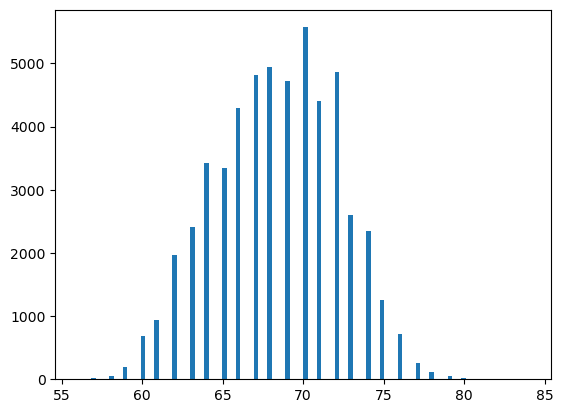

<Figure size 640x480 with 0 Axes>

In [150]:
# cleaning height
plt.hist(xvar.height[(xvar.height < 85) & (xvar.height > 55)], bins=100)
plt.show()
plt.clf()
xvar = xvar[(xvar.height < 85) & (xvar.height > 55)]

In [151]:
# final lookthrough of variables

for col in xvar.columns:
    print(col)
    print(xvar[col].value_counts())
    print('\n')

age
26    3290
27    3282
28    3130
25    3104
29    2958
24    2845
30    2811
31    2447
32    2301
23    2296
33    1995
22    1716
34    1711
35    1584
36    1458
37    1316
38    1244
21    1170
39    1084
42     990
40     948
41     897
20     871
43     796
44     651
45     608
19     546
46     536
47     498
48     457
49     439
50     401
51     330
52     323
18     282
56     259
54     250
55     247
57     238
53     233
59     212
58     188
60     184
61     169
62     156
63     129
64     111
65     103
66     100
67      63
68      55
69      31
Name: age, dtype: int64


body_type
5     14641
8     12703
9     11806
6      4709
7      3920
3      2627
4      1777
2      1009
1       442
10      409
Name: body_type, dtype: int64


drinks
socially       38091
rarely          5440
often           4574
not at all      2991
very often       410
desperately      249
Name: drinks, dtype: int64


education
college           30139
beyond college    20535
dropped out     

In [152]:
print(len(xvar))

54043


In [153]:
print(len(xvar.dropna()))

43642
